In [77]:
#data loading
import pandas as pd
import zipfile

predata = pd.read_csv('2transfers_balanced_smore+rund.csv', low_memory = False) 

In [3]:
#---------------------------------------------------pre-processing-----------------------------------------------------------#

#begin of preprocessing
import time

start = time.time()

In [20]:
#visualize the whole output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#columns to consider for training
predata.columns

Index(['canal', 'operativa', 'clientid', 'entity', 'reference',
       'trusted_indicator', 'iban_orig', 'iban_dest', 'amount',
       'accountbalance', 'ipaddress', 'browser_family', 'os_family', 'hour',
       'week', 'weekday', 'month', 'device', 'is_fraud'],
      dtype='object')

In [78]:
#convert amount and accountbalance to classes and assign a word to each interval  
import numpy as np 

#automatic labels
import string

class LabelCategorizer():
    def __init__(self, base_word = 'cat'):
        self.initial = 1
        self._alphabet_index = 0
        self.base_word = base_word
        self.current_word = self.base_word
        self.shift = 0

    def __str__(self):
        return 'Class: Label Categorizer\nBase word: ' + self.base_word + '\nCurrent Word: ' + self.current_word

    def get_next_word(self):
        if self.initial:
            self.initial = 0
            return self.current_word
               
        if self.shift > 0:
            self.current_word = self.current_word[-1] + self.current_word[:-1]
            self.shift -= 1
        else:
            self.current_word = self.current_word + string.ascii_lowercase[self._alphabet_index]
            self._alphabet_index = (self._alphabet_index + 1) % len(string.ascii_lowercase)
            self.shift = len(self.current_word) - 1

        return self.current_word

#replacement of the old columns with the new ones with classes 
def cutter(col, number, word, words_map):

    #make sure that only positives are assigned an interval
    col_min = max(predata[col].min(), 1)   
    col_max = max(predata[col].max(), 1)

    bins_a = np.geomspace(float(col_min), float(col_max), num = number)  
    bins_a[0] = bins_a[0]-1
    bins_aux = bins_a[1:]
    bins_aux = np.append(bins_aux, bins_a[-1]+1)
    bin_tuples = list(zip(bins_a, bins_aux))

    bins = pd.IntervalIndex.from_tuples(bin_tuples)
    
    #range of the intervals made
    print(bins)

    labels_a = []

    a = LabelCategorizer(base_word = word)

    for _ in range(number):
        labels_a.append(a.get_next_word())

    x = pd.cut(predata[col].to_list(), bins = bins)
    x.categories = labels_a
    predata[col] = x
   
    for i in range(number):
        words_map[labels_a[i]] = bins[i]       

#columns to apply the conversion        
columns = ['amount', 'accountbalance']  

#number of intervals for each column
number_bins = [40, 40]  

#base words assigned to each column on columns to apply the conversion
base_words = ['pink', 'red']

#get acess to the range of the interval based on the word that appears
values_map = {}

for i in range (len(columns)):
    cutter(columns[i], number_bins[i], base_words[i], values_map)

IntervalIndex([(0.0, 1.4129638602205492], (1.4129638602205492, 1.9964668702893555], (1.9964668702893555, 2.8209355358464863], (2.8209355358464863, 3.9858799641629745], (3.9858799641629745, 5.631904340539461] ... (179716.0592994492, 253932.296891375], (253932.296891375, 358797.15845030727], (358797.15845030727, 506967.41804011056], (506967.41804011056, 716326.64], (716326.64, 716327.64]], dtype='interval[float64, right]')
IntervalIndex([(0.0, 1.5754086471506301], (1.5754086471506301, 2.481912405516979], (2.481912405516979, 3.910026265121869], (3.910026265121869, 6.1598891886590765], (6.1598891886590765, 9.70434269330319] ... (8105183.876021702, 12768976.765030459], (12768976.765030459, 20116356.410894435], (20116356.410894435, 31691481.83888713], (31691481.83888713, 49927034.53], (49927034.53, 49927035.53]], dtype='interval[float64, right]')


In [79]:
#assign the word negaccount for negative values of accountbalance  
aux = predata['accountbalance'].values

vacc = []

for elm in aux:
    if str(elm) == 'nan':
        vacc.append('negaccount')
    else:
        vacc.append(elm)
        
    print(elm)
    
predata['accountbalance'] = vacc

nan
rbecdda
nan
nan
becddar
nan
nan
nan
rbecdda
ecddarb
daerbecd
erbecdda
rbecddae
cddarbe
aerbecdd
rbecddae
ecddarb
darbecd
becdar
daerbecd
rbecda
ddaerbec
erbecdda
rbecdda
becddar
rbecdda
nan
aerbecdd
nan
darbecd
ecdarb
becddar
ecdarb
nan
ddarbec
bedar
nan
ecddarb
nan
rbecddae
nan
ddarbec
erbecdda
arbecd
aerbecdd
nan
daerbecd
ecddaerb
cddarbe
nan
rbecda
darbe
ddaerbec
cddarbe
arbecdd
darbe
nan
arbecd
nan
darbecd
arbecdd
arbecd
darbec
nan
rbecddae
nan
nan
ecddarb
aerbecdd
cdarbe
rbecddae
ddarbec
nan
nan
ecdarb
erbecdda
cddaerbe
ddaerbec
darbecd
ecdarb
nan
nan
darbecd
cddarbe
nan
nan
nan
arbecdd
becdar
ddarbec
darbecd
arbecd
rbecdda
darbecd
ecddaerb
nan
arbecd
cdarbe
nan
aerbecdd
aerbecdd
rbecdda
ddarbec
arbecdd
aerbecdd
rbecda
nan
ecdarb
darbecd
nan
erbecdda
nan
becddar
ecdarb
aerbecdd
rbecdda
becddar
nan
cddarbe
erbecdda
aerbecdd
cddarbe
cdarbe
aerbecdd
rbecdda
becddar
arbecd
erbecdda
rbecda
becdar
becddar
cddaerbe
becddar
becddar
cddarbe
becddar
rbecddae
cddarbe
rbecddae
nan
arbecd


arbecd
becdar
nan
nan
arbecd
ecddarb
rbecdda
rbecdda
ecdarb
cddarbe
ddarbec
aerbecdd
nan
darbe
nan
becdar
darbecd
darbec
fbecddaer
ecddarb
rbecddae
nan
erbecdda
erbecdda
ddaerbec
darbecd
ddarbec
darbecd
nan
nan
arbecdd
rbecddae
becdar
rbecdda
rbecdda
ddarbec
ddarbec
ddarbec
becdar
arbecd
nan
rbecdda
cddaerbe
nan
becddar
arbecd
nan
erbecdda
cddaerbe
ddarbec
becdar
cdarbe
nan
becddar
ddaerbec
becddar
becddaer
arbed
nan
daerbecd
nan
ecddarb
darbecd
daerbecd
cddarbe
ddarbec
arbecd
ddarbec
ecddarb
ddarbec
arbecdd
cddaerfbe
becddaerf
nan
aerbecdd
ddarbec
ecddaerb
ddarbec
aerbecdd
nan
ddarbec
rbecda
rbecdda
ecddarb
cdarbe
nan
daerbecd
nan
becdar
arbecd
nan
ecddarb
nan
rbecddae
cddarbe
nan
nan
nan
cdarbe
rbecdda
ddarbec
becddar
cddaerbe
cddarbe
rbecddae
nan
becdar
erbecdda
rbecddae
erbecdda
reda
arbecd
ecddarb
cdarbe
darbecd
rbecdda
darbec
becddar
nan
rbecdda
becddar
becdar
darbecd
becddar
erbecdda
cddarbe
nan
rbecddae
cddarbe
becdar
cdarbe
cddaerbe
arbecdd
rbecda
arbecd
arbecd
arbecdd
ddarbec

nan
ddarbec
ddaerbec
rbecdda
arbecd
nan
rbecddae
ecddarb
nan
becddar
ddarbec
ecddarb
rbecda
cdarbe
nan
ddaerbec
ecddarb
ecddarb
ecdarb
arbecdd
ecdarb
ecdarb
rbecddae
nan
becddar
erbecdda
becdar
rbecdda
nan
arbecdd
nan
rbecda
erbecdda
ecddarb
rbecdda
nan
cddarbe
nan
cddarbe
ecddarb
arbecdd
nan
arbecdd
nan
nan
rbecdda
nan
nan
becddar
ddaerbec
cddarbe
nan
cdarbe
nan
nan
ecddarb
cddarbe
rbecda
nan
ecdarb
darbe
ecddarb
nan
aerbecdd
ecddarb
nan
arbecd
nan
ecddarb
arbecd
ecddarb
arbecdd
becddar
edarb
ddarbec
ddarbec
ddaerbec
darbecd
nan
nan
darbec
rbecdda
cddarbe
cddarbe
arbecdd
ddarbec
ecdarb
rbecddae
cdarbe
arbecdd
rbecdda
nan
becddaer
darbecd
rbecdda
daerbecd
rbecda
nan
nan
daerbecd
arbecd
arbecdd
darbecd
rbecdda
nan
daerbecd
ddarbec
ddarbec
ddarbec
ecdarb
arbecd
darbec
erbecdda
arbecd
aerbecdd
becddar
cddaerbe
erbecdda
cddaerbe
erbecdda
becdar
ddarbec
darbecd
nan
darbecd
cdarbe
daerbecd
arbecdd
nan
cddarbe
becddar
aerbecdd
rbecdda
rbecdda
erbecdda
ecddarb
erbecdda
arbecdd
arbecdd
daerbecd

darbecd
becddar
arbecdd
ddarbec
darbecd
ddarbec
aerbecdd
rbecdda
darbecd
ddarbec
ddarbec
darbecd
cdarbe
erbecdda
darbecd
becddar
arbecd
cddarbe
erbecdda
ecdarb
rbecddae
nan
arbecd
ecddarb
arbecd
becddar
erbecdda
ddarbec
arbecd
cddarbe
arbecd
arbecd
ddaerbec
cddarbe
rbecda
arbecd
ddarbec
ecddarb
rbecdda
daerbecd
arbecdd
rbecdda
rbecda
becdar
rbecda
becddar
erbecdda
rbecddae
darbe
rbecddae
ddarbec
ddaerbec
darbe
daerbecd
rbecda
nan
rbeda
arbecd
cddarbe
nan
arbecd
ecddarb
nan
cddarbe
arbecd
ecddarb
ddarbec
ddaerbec
rbecda
darbecd
cddarbe
darbecd
becdar
darbecd
darbec
rbecda
ecddarb
cddarbe
nan
ddarbec
arbed
arbed
darbec
nan
darbecd
nan
becddar
arbecdd
darbecd
darbe
darbe
nan
cddarbe
arbecdd
arbecdd
cddarbe
ecddarb
darbe
rbecddae
ddarbec
bedar
darbecd
daerbecd
arbecd
darbecd
rbecdda
ecdarb
nan
ddarbec
daerbecd
ecddarb
cddarbe
darbecd
ecddarb
ddarbec
rbecddae
rbecda
arbecd
ddarbec
becddar
cddarbe
ddarbec
ecdarb
ddarbec
arbecd
rbecda
becdar
rbecda
rbecddae
arbecd
arbecdd
arbecdd
cddarbe
arbe

arbecd
cddarbe
nan
nan
darbecd
cddarbe
aerbecdd
nan
darbec
nan
nan
edar
becddar
arbecdd
rbecda
becddar
rbeda
rbecda
becdar
rbecda
rbecda
daerbecd
darbecd
ddaerbec
becddar
becdar
rbecddae
ddarbec
arbecd
erbecdda
arbecdd
becddar
darbecd
rbecda
arbecd
nan
ddaerbec
nan
cddarbe
ecdarb
ddarbec
darbecd
daerbecd
arbecdd
ecdarb
ecdarb
cddarbe
cdarbe
daerbecd
nan
becddar
ddarbec
ecdarb
erbecdda
arbecd
nan
cddarbe
ddarbec
rbecddae
ddaerbec
ecddarb
arbecd
cddarbe
darbecd
becdar
arbecd
nan
darbe
cddarbe
nan
daerbecd
cdarbe
ddarbec
nan
becdar
ecdarb
darbecd
erbecdda
cddarbe
darbe
darbecd
arbecdd
becddar
nan
nan
arbecd
daerbecd
ecddarb
ecddarb
cddarbe
ecddarb
arbecdd
rbecddae
darbecd
rbecddae
arbecd
ecdarb
darbecd
erbecdda
darbec
arbecd
becddar
arbecdd
arbecd
darbecd
ecddarb
erbecdda
rbecda
aerbecdd
daerbecd
ecddarb
rbecda
becdar
arbecdd
daerbecd
cddarbe
daerbecd
cddarbe
nan
nan
daerbecd
ddarbec
rbecddae
ddarbec
daerbecd
darbecd
rbecdda
cddarbe
rbecda
cddarbe
arbecdd
arbecd
rbecda
ddaerbec
darbecd
rb

In [ ]:
#interval that a word corresponds to
#values_map['pinka']

In [80]:
#convert hours to classes and assign a word to each interval
bins_hour = [0, 4, 8, 12, 16, 20, 24]

#labels assigned to each interval
labels_hour = ['dawn', 'earlymorning', 'morning', 'afternoon', 'dusk', 'night']

predata['hour'] = list(pd.cut(predata['hour'], bins = bins_hour, labels = labels_hour, retbins = True, include_lowest = True)[0])

In [81]:
#convert trusted_indicator to classes and assign a word to each interval  
bins_ti = [0.0, 0.5, 1.0]

#labels assigned to each interval
labels_ti = ['ntrusted', 'trusted']

predata['trusted_indicator'] = list(pd.cut(predata['trusted_indicator'], bins = bins_ti, labels = labels_ti, retbins = True, include_lowest = True)[0])

In [82]:
#add letter before number to distinguish between similar numbers from different columns
cols = ['entity', 'reference', 'iban_orig', 'iban_dest', 'ipaddress', 'clientid', 'week']

identifier = ['e', 'r', 'io', 'id', 'ip', 'c', 'w']  

for col in range(len(cols)):
    predata[cols[col]] = predata[cols[col]].apply(lambda x: identifier[col] + str(x))

In [83]:
#convert binary, True, False and UNKNOWN to other words 
def apply_map(df, col, target_map):
    df[col] = df[col].apply(lambda x: target_map.get(str(x)))

cols_maps = [('is_fraud', {'0':'nfraud', '1':'fraud'}),
             ('weekday', {'0':'mon', '1':'tue', '2':'wed', '3':'thu', '4':'fri', '5':'sat', '6':'sun'}),
             ('month', {'1':'jan', '2':'feb', '3':'mar', '4':'apr', '5':'may', '6':'jun', '7':'jul', '8':'aug', '9':'sep', 
                       '10':'oct', '11':'nov', '12':'dec'})]           

for comb in cols_maps:
    apply_map(predata, comb[0], comb[1])

In [84]:
#make fraud column as the center column
new_order = ['canal', 'operativa', 'clientid', 'entity', 'reference', 'trusted_indicator', 'iban_orig', 'iban_dest', 'amount', 
             'is_fraud', 'accountbalance', 'ipaddress', 'browser_family', 'os_family', 'hour', 'week', 'weekday', 'month', 
             'device']

predata = predata[new_order]

In [86]:
#convert dataframe to numpy array of arrays
sentences = predata.to_numpy()

#convert numpy array of arrays to pd series
sentences_aux = [list(curr) for curr in sentences]

sentences_series = pd.Series(sentences_aux)

In [85]:
#copy of the current dataframe without the fraud column for metrics
X_np = predata.copy()
del X_np['is_fraud']

In [87]:
#make the same process for the dataframe without the fraud column
sentences_np = X_np.to_numpy()

sentences_aux_np = [list(curr) for curr in sentences_np]

sentences_series_np = pd.Series(sentences_aux_np)

In [88]:
#get size of the corpus 
token_count = sum([len(sentence) for sentence in sentences_series])

print("This corpus contains {} tokens".format(token_count))

This corpus contains 270256 tokens


In [ ]:
#end of preprocessing
stop = time.time()

print(f"Training time: {stop - start}s")

In [56]:
#--------------------------------------------------------training------------------------------------------------------------#

#begin of training
import time

begin = time.time()

In [89]:
#callback to print loss after each epoch
import gensim.models.word2vec as w2v
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    
    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))    
        
        self.epoch += 1

In [91]:
#-------------------------------------implement predict output word as a prediction method------------------------------------# 
from sklearn.base import BaseEstimator, ClassifierMixin
import multiprocessing

#implement word2vec as a class for sklearn
class MyGensim(BaseEstimator, ClassifierMixin):

    def __init__(self, sg, cycles, vector_size, window, sample, min_count, negative, hs, ns_exponent, alpha, min_alpha):
       
        self.sg = sg
        self.cycles = cycles
        self.vector_size = vector_size
        self.window = window
        self.sample = sample
        self.min_count = min_count
        self.negative = negative
        self.hs = hs
        self.ns_exponent = ns_exponent
        self.alpha = alpha
        self.min_alpha = min_alpha
        
        self.model = w2v.Word2Vec(
            sg = sg, #skip-gram 
            workers = multiprocessing.cpu_count(), #cores used
            vector_size = vector_size, #dimension of the embedding space - to vary
            window = window, #words befores and after center word - to vary
            sample = sample, #subsampling 
            min_count = min_count, #frequency of words
            negative = negative, #noise-words - to vary
            hs = hs, #negative sampling 
            ns_exponent = ns_exponent, #exponent to shape negative sampling - to vary
            alpha = alpha, #initial learning rate - to vary
            min_alpha = min_alpha #final learning rate - to vary
            ) 

 
    #implement fit method    
    def fit(self, X, y = None):

        #vocabulary creation
        self.model.build_vocab(X) 

        #model training
        self.model.train(X, epochs = self.cycles, total_examples = self.model.corpus_count, compute_loss = True, 
                         callbacks = [callback()])
        
        self.X = X
        self.y = y
        
        return self

    
    #implement predict method
    def predict(self, X):

        predictions = []
        
        for eval_row in X:

            #probability distribution of the center word given context words
            param = self.model.predict_output_word(eval_row, topn = len(self.model.wv.index_to_key))
            
            #convert the results to a map
            result_values = {}
            
            #filter the results for fraud or not-fraud
            for elem in param:
                if (elem[0] == 'nfraud' or elem[0] == 'fraud'):
                    result_values[elem[0]] = elem[1]
            
            #decision rule is the word with biggest probability
            if result_values['nfraud'] > result_values['fraud']:
                predictions.append(0)
            else:
                predictions.append(1)
        
        return predictions

       
    #method for predicting a single transaction
    def predict_single_transaction(self, transaction):
        
        #probability distribution of the center word given context words
        param = self.model.predict_output_word(transaction, topn = len(self.model.wv.index_to_key))
            
        #convert the results to a map
        result_values = {}

        ##filter the results for fraud or not-fraud
        for elem in param:
            if (elem[0] == 'nfraud' or elem[0] == 'fraud'):
                result_values[elem[0]] = elem[1]
        
        #decision rule is the word with highest probability
        if result_values['nfraud'] > result_values['fraud']:
            return 0
        
        return 1
        
        
    #vocabulary function
    def index_to_key(self):
        return self.model.wv.index_to_key

    #obtain the model
    def getModel(self):
        return self.model
    
    #vector operations
    #def topn_most_similar(self, word, n = 5):
    #    return self.model.wv.most_similar(word)[:n]

In [92]:
#hyperparameters
#constant
sg = 1
sample = 0
min_count = 1
hs = 0

#to vary
cycles = 5
vector_size = 5
window = 9
negative = 5
ns_exponent = 0
alpha = 0.025
min_alpha = 0.0005

In [93]:
#initialize the model
model = MyGensim(sg = sg, cycles = cycles, vector_size = vector_size, window = window, sample = sample, min_count = min_count, negative = negative, 
ns_exponent = ns_exponent, hs = hs, alpha = alpha, min_alpha = min_alpha) 


#define X and y
X = sentences_series  #series
y = []  #list
    
for elem in predata['is_fraud']:
    if elem == "fraud":
        y.append(1)
    else:
        y.append(0)

        
#stratified k-fold
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits = 2, random_state = 123, shuffle = True).split(X, y) #change for 10 n_splits!!!!!!!!!!!!!!!!!
    
scores = []
   
for k, (train, test) in enumerate(kfold):
    model.fit(X[train], np.array(y)[train])  #series, list
    score = model.score(sentences_series_np[test], np.array(y)[test])  #series, list
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k + 1, np.bincount(np.array(y)[train]), score))
    
#mean of the accuracies obtained in all folders and its standard deviation
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Loss after epoch 0: 165783.0625
Loss after epoch 1: 145121.625
Loss after epoch 2: 132361.5
Loss after epoch 3: 127220.0625
Loss after epoch 4: 127181.5625
Fold:  1, Class dist.: [3556 3556], Acc: 0.500
Loss after epoch 0: 129430.4375
Loss after epoch 1: 124487.71875
Loss after epoch 2: 118698.9375
Loss after epoch 3: 118045.90625
Loss after epoch 4: 118062.125
Fold:  2, Class dist.: [3556 3556], Acc: 0.500

CV accuracy: 0.500 +/- 0.000


In [21]:
#end of training
end = time.time()
print(f"Training time: {end - begin}s")

Training time: 12.69525146484375s


In [81]:
#info about the trained model
print(model)

MyGensim(alp=0.025, architecture=1, context=9, cores=8, cycles=100, dim=2,
         exponent=0.75, m_alp=0.0005, min_count=1, negative=5, ng=0, sample=0,
         swindows=False)


In [19]:
#vocabulary size
print(len(model.index_to_key()))

14559


In [84]:
#words in vocabulary
print(model.index_to_key()) 

['e3', 'r3', 'ntrusted', 'pc', 'windows', 'chrome', 'fraud', 'nfraud', 'nbe', 'trfsep', 'nbp', 'morning', 'trfips', 'afternoon', 'trfint', 'trusted', 'dusk', 'apr', 'mon', 'thu', 'android', 'mbp', 'tue', 'tmobile', 'wed', 'fri', 'negaccount', 'safari', 'jan', 'ttablet', 'other', 'may', 'ios', 'night', 'dec', 'bicndkap', 'sep', 'w17', 'oct', 'feb', 'mar', 'cddarbe', 'kapbicnd', 'ddarbec', 'darbecd', 'firefox', 'w18', 'ndkapbic', 'ecddarb', 'nov', 'w4', 'cnkapbi', 'bicnkap', 'apbicnk', 'arbecdd', 'becddar', 'kapbicn', 'rbecddae', 'cndkapbi', 'icnkapb', 'aug', 'rbecdda', 'pbicnka', 'dkapbicn', 'icndkapb', 'edge', 'arbecd', 'nkapbi', 'rbecda', 'sat', 'erbecdda', 'w52', 'sun', 'w5', 'w16', 'w19', 'apbicndk', 'w20', 'nkapbic', 'w37', 'daerbecd', 'dawn', 'ie', 'ip196119111182', 'cdarbe', 'w9', 'apbink', 'aerbecdd', 'w6', 'becdar', 'id14378556', 'id16241253', 'ecdarb', 'w36', 'kapbin', 'pbinka', 'earlymorning', 'w14', 'macosx', 'mbe', 'ipUNKNOWN', 'w21', 'ddaerbec', 'w51', 'darbec', 'id1658868

In [ ]:
#----------------------------------------------------grid-search--------------------------------------------------------------# 

#grid search function
from sklearn.model_selection import GridSearchCV


#initialize the model - run the hyperparameters cell
model = MyGensim(sg = sg, cycles = cycles, vector_size = vector_size, window = window, sample = sample, min_count = min_count, 
                 negative = negative, ns_exponent = ns_exponent, hs = hs, alpha = alpha, min_alpha = min_alpha) 


#parameters that are going to be changed to achieve the best combination 
parameters = {'cycles':range(5, 80, 10), 'vector_size':range(2, 20, 2), 'window':range(1, 9, 1), 'negative':range(2, 20, 1), 
              'ns_exponent':(-1, -0.5, -0.75, 0, 0.5, 0.75, 1), 'alpha':(0.01, 0.025, 0.05), 
              'min_alpha':(0.0001, 0.00025, 0.0005)} 

#search will perform all the possible combinations of these parameters in order to find the best one
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', n_jobs = 1, cv = 10, verbose = 10)

#fit results to test data
grid_result = grid_search.fit(X, y)

#summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (mean, stdev, param))

In [98]:
#--------------------------------------------------------metrics--------------------------------------------------------------#

from imblearn.metrics import geometric_mean_score
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, matthews_corrcoef, confusion_matrix, precision_recall_curve
 
    
#precision, recall, f-score
#or X_np.values
precision, recall, fscore, support = precision_recall_fscore_support(y, model.predict(sentences_series_np), average = 'micro')  

#ratio tp / (tp + fp) - ability not to label a negative sample as positive
print('precision: {}'.format(precision))

#ratio tp / (tp + fn) - ability to find all the positive samples - best is 1, worst is 0
print('recall: {}'.format(recall))

#weighted harmonic mean of the precision and recall - best is 1, worst is 0
print('fscore: {}'.format(fscore))
   
    
#confusion matrix
print(confusion_matrix(y, model.predict(X)))
   
    
#true positives, false positives, true negatives, false negatives
tn, fp, fn, tp = confusion_matrix(y, model.predict(sentences_series_np)).ravel()
print('true negatives: {}'.format(tn))
print('false positives: {}'.format(fp))
print('false negatives: {}'.format(fn))
print('true positives: {}'.format(tp))
    
    
#specificity - ability to predict true negatives of each available category - recall of the negative class
specifity = tn / (tn + fp)
print('specifity: {}'.format(specifity))
   
    
#sensitivity - ability to predict true positives of each available category = recall
  
    
#error rate
error_rate = 1 - np.mean(scores)
print('error rate: {}'.format(error_rate))
  
    
#matthews correlation coefficient - measure of the quality of binary classifications 
#can be used even if the classes are of very different sizes - is in essence a correlation coefficient between -1 and +1
#+1 means perfect prediction, 0 an average random prediction, -1 an inverse prediction
print('MCC: {}'.format((matthews_corrcoef(y, model.predict(sentences_series_np)))))
  
    
#precision-recall curve - compute precision-recall pairs for different probability thresholds
print(precision_recall_curve(y, model.predict(sentences_series_np)))


#roc curve 
import matplotlib.pyplot as plt
from sklearn import metrics
    
fpr, tpr, thresholds = metrics.roc_curve(y, model.predict(sentences_series_np))  
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'Word2vec')
display.plot()
plt.show()
 
    
#g-mean - squared root of the product of the sensitivity and specificity - best is 1, worst is 0
print('G-mean:', (geometric_mean_score(y, model.predict(sentences_series_np), average = 'micro')))

precision: 0.5
recall: 0.5
fscore: 0.5


KeyboardInterrupt: 

ValueError: operands could not be broadcast together with shapes (5,) (10,) 

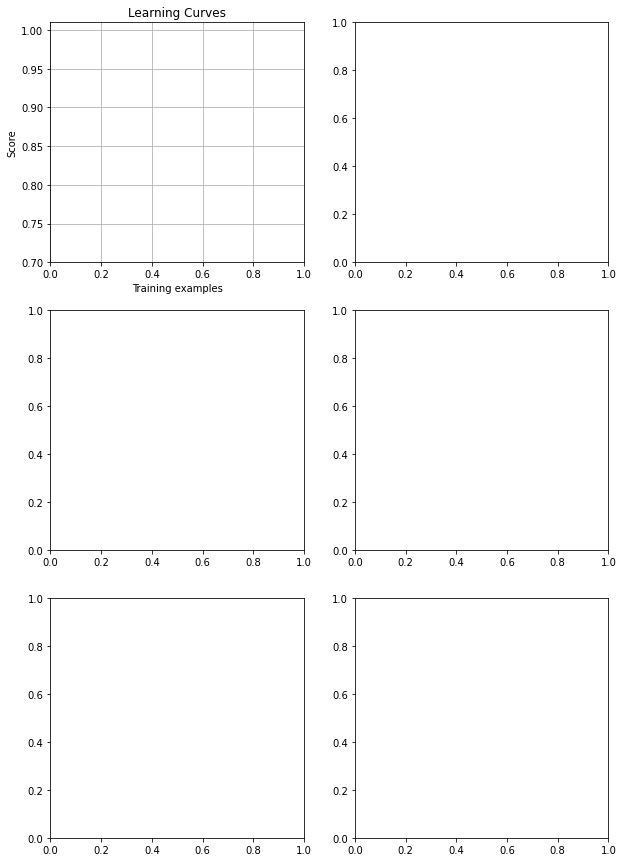

In [94]:
#learning curve    
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#generates 3 plots - test and training, training samples vs fit times, fit times vs score
def plot_learning_curve(estimator, title, X, y, axes = None, ylim = None, cv = None, n_jobs = None, 
                        train_sizes = np.linspace(0.1, 1.0, 5)):
    
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize = (20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv = cv, n_jobs = n_jobs, 
                                                                          train_sizes = train_sizes, return_times = True)
    
    
    train_scores_mean = np.mean(train_scores, axis = 0)
    train_scores_std = np.std(train_scores, axis = 0)
    test_scores_mean = np.mean(test_scores, axis = 0)
    test_scores_std = np.std(test_scores, axis = 0)
    fit_times_mean = np.mean(fit_times, axis = 0)
    fit_times_std = np.std(fit_times, axis = 0)

    #plot learning curves
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1,
        color = "r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1,
        color = "g")
    axes[0].plot(train_sizes, train_scores_mean, "o-", color = "r", label = "Training score")
    axes[0].plot(train_sizes, test_scores_mean, "o-", color = "g", label = "Cross-validation score")
    axes[0].legend(loc = "best")

    #plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha = 0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    #plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(fit_time_sorted, test_scores_mean_sorted - test_scores_std_sorted, 
                         test_scores_mean_sorted + test_scores_std_sorted, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize = (10, 15))


title = "Learning Curves"

#score curves, each time with 20% data randomly selected as a validation set
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

estimator = model
plot_learning_curve(estimator, title, X, y, axes = axes[:, 0], ylim = (0.7, 1.01), cv = cv, n_jobs = 4)

plt.show()

In [85]:
#use the trained model to predict the outcome of a single transaction
model.predict_single_transaction(['mbp', 'trfint', 'c3063564', 'e3', 'r3', 'ntrusted', 'io3063565', 'id6394530', 'ndkapbic', 
                                  'negaccount', 'ip89153168140', 'safari', 'ios', 'morning', 'w8', 'sat', 'feb', 'tmobile'])

1

In [ ]:
#vector operation
#print(model.topn_most_similar('pc', 6))